# IMERSÃO DADOS 2: EDUCAÇÃO NO BRASIL

## IMPORTAÇÃO DE BIBLIOTECAS

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTAÇÃO DO DATASET

In [102]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [103]:
#Visualizar o tamanho do dataset
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 127380 linhas e 136 colunas


In [104]:
#colunas do dataset
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [105]:
#Visualizando os estados
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [106]:
#Verificando valores nulos
dados.isnull().sum()

NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q021                       0
Q022                       0
Q023                       0
Q024                       0
Q025                       0
Length: 136, dtype: int64

In [107]:
#Quantidade de estados
len(dados['SG_UF_RESIDENCIA'].unique())

27

In [108]:
#Quantidade de vezes que cada estado apareceu
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [109]:
#Tipos dos dados
dados.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
CO_UF_RESIDENCIA            int64
                            ...  
Q021                       object
Q022                       object
Q023                       object
Q024                       object
Q025                       object
Length: 136, dtype: object

## EXPLORANDO O DATASET

#### IDADES

In [110]:
# Visualizando a contagem dos alunos por idade
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [111]:
#Analisando o aluno mais novo e o mais velho
minimo = dados['NU_IDADE'].min()
maximo = dados['NU_IDADE'].max()
print(f'O aluno mais novo tem {minimo} anos e o mais velho {maximo} anos')

O aluno mais novo tem 13 anos e o mais velho 82 anos


In [112]:
#Idades dos alunos treneiros
dados.query("IN_TREINEIRO == 1")['NU_IDADE'].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

#### SEXO

Text(0, 0.5, 'QUANTIDADE')

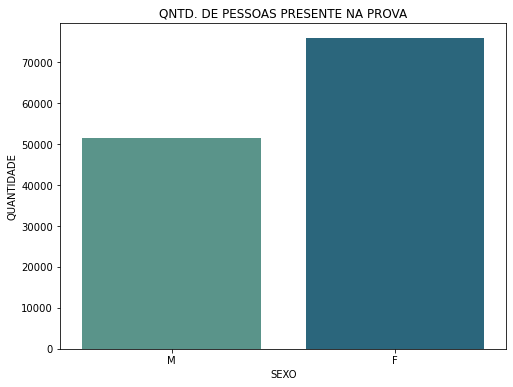

In [113]:
plt.figure(figsize=(8,6))
sns.countplot(x='TP_SEXO', data=dados, palette='crest')
plt.title('QNTD. DE PESSOAS PRESENTE NA PROVA')
plt.xlabel('SEXO')
plt.ylabel('QUANTIDADE')

        Conclusões
        Há maior quantidade de mulheres realizando as provas

#### RAÇA

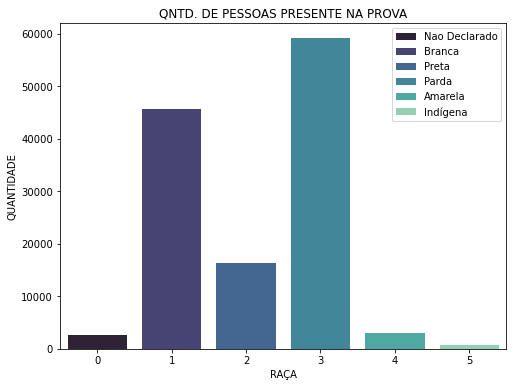

In [114]:
plt.figure(figsize=(8,6))
sns.countplot(x='TP_COR_RACA', data=dados, palette='mako', hue='TP_COR_RACA', dodge=False)
plt.title('QNTD. DE PESSOAS PRESENTE NA PROVA')
plt.xlabel('RAÇA')
plt.ylabel('QUANTIDADE')
plt.legend(labels=['Nao Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

        Conclusões
        Há maior quantidade de pardos realizando as provas

#### NOTAS

In [115]:
#lista com as notas que serão analisadas
provas = ['NU_NOTA_LC', 'NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_MT']

In [116]:
#Visualização geral das informaçoes das notas
dados[provas].describe()

,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT
count,98043.000000,98043.000000,92758.000000,98043.000000,92758.000000
mean,520.463928,571.570025,477.964015,507.365912,523.555206
std,64.556578,188.076455,76.296099,82.972839,109.416939
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,483.700000,480.000000,418.000000,447.900000,435.300000
50%,526.100000,580.000000,470.200000,510.900000,501.600000
75%,565.100000,680.000000,533.300000,567.100000,598.200000
max,801.700000,1000.000000,797.300000,809.400000,985.000000


<AxesSubplot:>

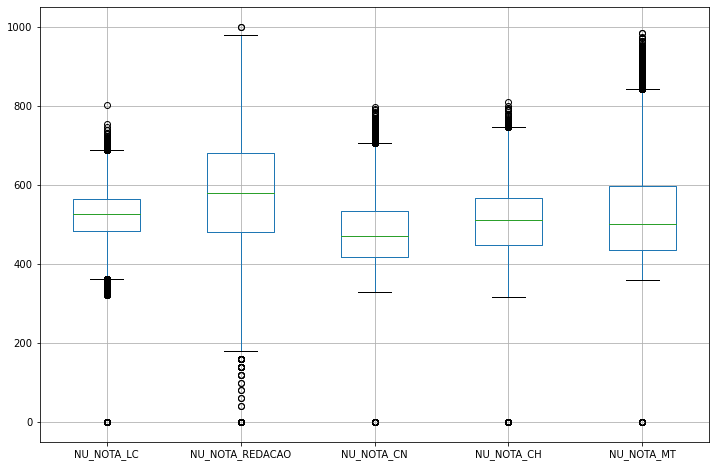

In [117]:
#Boxplot das notas das provas
dados[provas].boxplot(figsize=(12,8))

In [118]:
#Criando a coluna do total das notas
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

In [119]:
#Eliminando dados com a nota 0
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

In [120]:
#Ordenando os valores das rendas "Q006"
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()

Text(0, 0.5, 'NOTA_TOTAL')

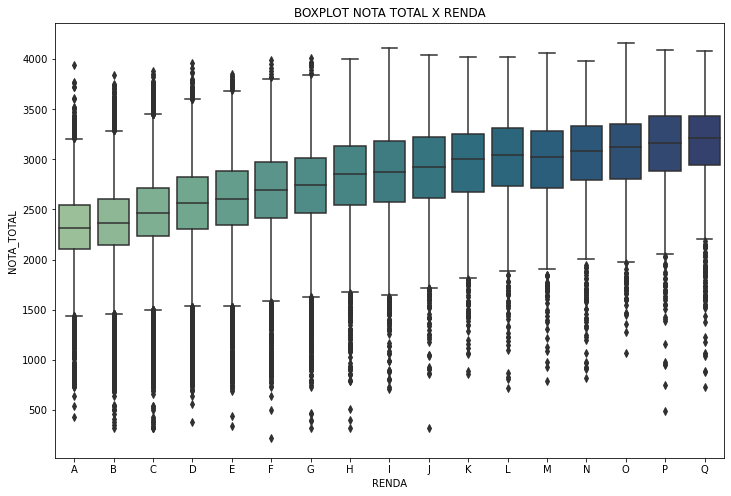

In [121]:
#Boxplot da NotaTotal através da faixa de renda
plt.figure(figsize=(12,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_nota_zero, order = renda_ordenada, palette ='crest')
plt.title('BOXPLOT NOTA TOTAL X RENDA')
plt.xlabel('RENDA')
plt.ylabel('NOTA_TOTAL')


        CONCLUSÕES

        A medida que a renda aumenta, a mediana das notas também aumentam.

Text(0, 0.5, 'NOTA_TOTAL')

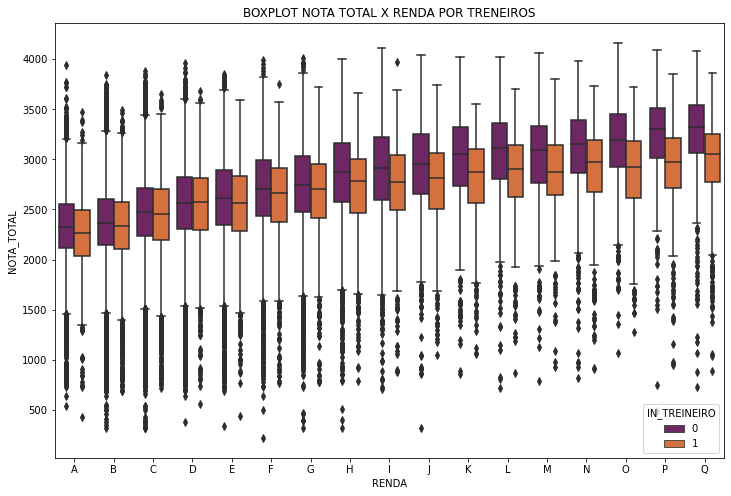

In [122]:
#COMPARANDO AS NOTAS SE É TRENEIROS OU NÃO
plt.figure(figsize=(12,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_nota_zero, order = renda_ordenada, palette ='inferno', hue='IN_TREINEIRO')
plt.title('BOXPLOT NOTA TOTAL X RENDA POR TRENEIROS')
plt.xlabel('RENDA')
plt.ylabel('NOTA_TOTAL')
# 0 = não treneiros
# 1 = treneiros

In [123]:
#Verificando quantidade de inscritos pela raça
dados_sem_nota_zero['TP_COR_RACA'].value_counts()

3    44995
1    36304
2    12081
4     2321
0     1934
5      583
Name: TP_COR_RACA, dtype: int64

In [124]:
#Trocando os valores de acordo com o dicionario de dados
raca = dados_sem_nota_zero[['TP_COR_RACA', 'NU_NOTA_TOTAL']]
raca.replace(0, 'Nao_declarado', inplace = True)
raca.replace(1, 'Branca', inplace = True)
raca.replace(2, 'Preta', inplace = True)
raca.replace(3, 'Parda', inplace = True)
raca.replace(4, 'Amarela', inplace = True)
raca.replace(5, 'Indígena', inplace = True)

C:\Users\PICHAU\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0.5, 1.0, 'NOTA TOTAL X RAÇA')

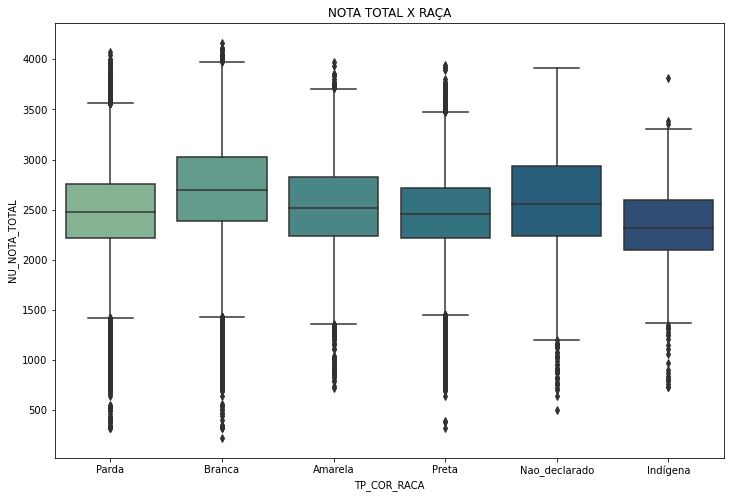

In [125]:
#NOTAS DE CANDIDATOS DE ACORDO COM A DECLARAÇÃO DA RAÇA
plt.figure(figsize=(12,8))
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_TOTAL', data=raca, palette='crest')
plt.title('NOTA TOTAL X RAÇA')

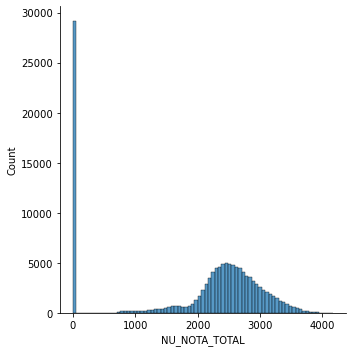

In [126]:
#VERIFICANDO AS DISTRIBUIÇÕES DAS NOTAS
sns.displot(dados['NU_NOTA_TOTAL'])

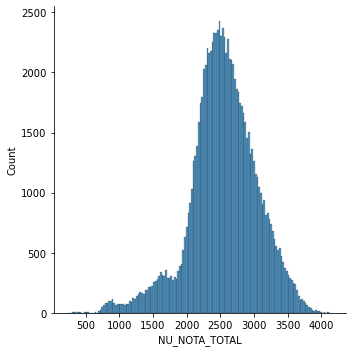

In [127]:
#VERIFICANDO AS DISTRIBUIÇÕES DAS NOTAS SEM AS NOTAS 0
sns.displot(dados_sem_nota_zero['NU_NOTA_TOTAL'])

In [128]:
provas.append('NU_NOTA_TOTAL')

In [129]:
correlação = dados_sem_nota_zero[provas].corr()
correlação

,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_TOTAL
NU_NOTA_LC,1.000000,0.535797,0.641624,0.744170,0.587710,0.711686
NU_NOTA_REDACAO,0.535797,1.000000,0.504740,0.528338,0.493046,0.783647
NU_NOTA_CN,0.641624,0.504740,1.000000,0.668979,0.649527,0.785600
NU_NOTA_CH,0.744170,0.528338,0.668979,1.000000,0.610332,0.735534
NU_NOTA_MT,0.587710,0.493046,0.649527,0.610332,1.000000,0.790051
NU_NOTA_TOTAL,0.711686,0.783647,0.785600,0.735534,0.790051,1.000000


Text(0.5, 1.0, 'CORRELAÇÃO VARIÁVEIS NUMÉRICAS')

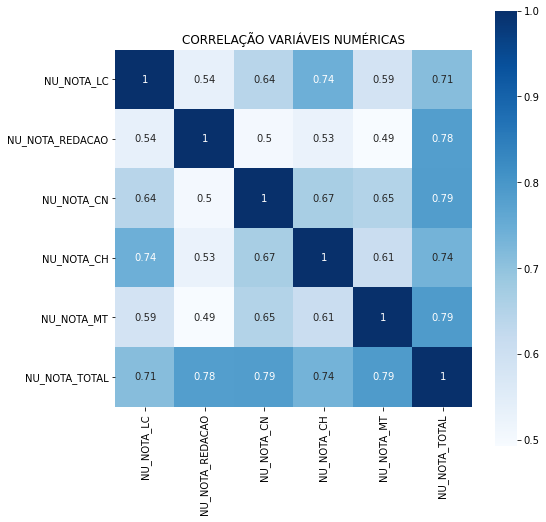

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(correlação, cmap='Blues', annot=True, square=True)
plt.title('CORRELAÇÃO VARIÁVEIS NUMÉRICAS')

#### CONCLUSÃO
##### ANÁLISE EXPLORATÓRIA DE DADOS

Por meio da análise exploratória de dados, foi possível concluir todas as hipóteses.


1. Maior quantidade de candidatos do sexo feminino.

2. Candidatos de 18 anos são a maioria.

3. Há maior quantidade de pardos realizando as provas

4. A medida que a renda aumenta, as notas também aumentam.
